In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [118]:
df = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/senate_county_candidate.csv')
df_sc = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/senate_county.csv')
df_geo = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/uscities.csv')

pd.set_option('display.max_columns', None)
df.head()

In [132]:
#change column 'total_votes' to 'votes', add columns named 'won' 'total_votes' and 'votes/total_votes'
df1 = df.copy()
result = [False]*14125
county = df_sc['county']
current_votes = df_sc['current_votes']
total_votes = []
i = 0
for index, row in df1.iterrows():
    if row['county'] == county.iloc[i] and i < 3581:
        result[index] = True
        i += 1
    total_votes.append(current_votes.iloc[i-1])
df1['won'] = result
df1['county'] = df1['county'].str.replace(' County', '')
df1.rename(columns={"total_votes": "winner_votes"}, inplace=True)
df1['total_votes'] = total_votes
df1['winner_votes/total_votes'] = df1['winner_votes'] / df1['total_votes']
df1.head()

,state,county,candidate,party,winner_votes,won,total_votes,winner_votes/total_votes
0,Delaware,Kent,Lauren Witzke,REP,38571,True,84975,0.453910
1,Delaware,Kent,Mark Turley,IPD,1553,False,84975,0.018276
2,Delaware,Kent,Nadine Frost,LIB,958,False,84975,0.011274
3,Delaware,New Castle,Lauren Witzke,REP,80081,True,279462,0.286554
4,Delaware,New Castle,Mark Turley,IPD,4277,False,279462,0.015304


In [133]:
df_winner = df1.copy()
df_winner.drop(df1[df1['won'] == False].index, inplace = True)
df_winner['REP_won'] = df_winner['party'] == 'REP'
df_winner.head()

,state,county,candidate,party,winner_votes,won,total_votes,winner_votes/total_votes,REP_won
0,Delaware,Kent,Lauren Witzke,REP,38571,True,84975,0.453910,True
3,Delaware,New Castle,Lauren Witzke,REP,80081,True,279462,0.286554,True
6,Delaware,Sussex,Christopher Coons,DEM,56137,True,126498,0.443778,False
9,Georgia,Appling,Jon Ossoff,DEM,1753,True,8187,0.214120,False
11,Georgia,Atkinson,Jon Ossoff,DEM,773,True,3097,0.249596,False
...,...,...,...,...,...,...,...,...,...
14007,Georgia,White,Kelly Loeffler,REP,4033,True,14646,0.275365,True
14026,Georgia,Whitfield,Doug Collins,REP,9455,True,35593,0.265642,True
14045,Georgia,Wilcox,Doug Collins,REP,1051,True,3218,0.326600,True
14065,Georgia,Wilkes,Raphael Warnock,DEM,1257,True,4905,0.256269,False


In [125]:
df_winner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 0 to 14085
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              3581 non-null   object 
 1   county             3581 non-null   object 
 2   candidate          3581 non-null   object 
 3   party              3581 non-null   object 
 4   votes              3581 non-null   int64  
 5   won                3581 non-null   bool   
 6   total_votes        3581 non-null   int64  
 7   votes/total_votes  3579 non-null   float64
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 227.3+ KB


Text(0.5, 1.0, 'Voting Shifts From the 2016 Election to 2020 Election')

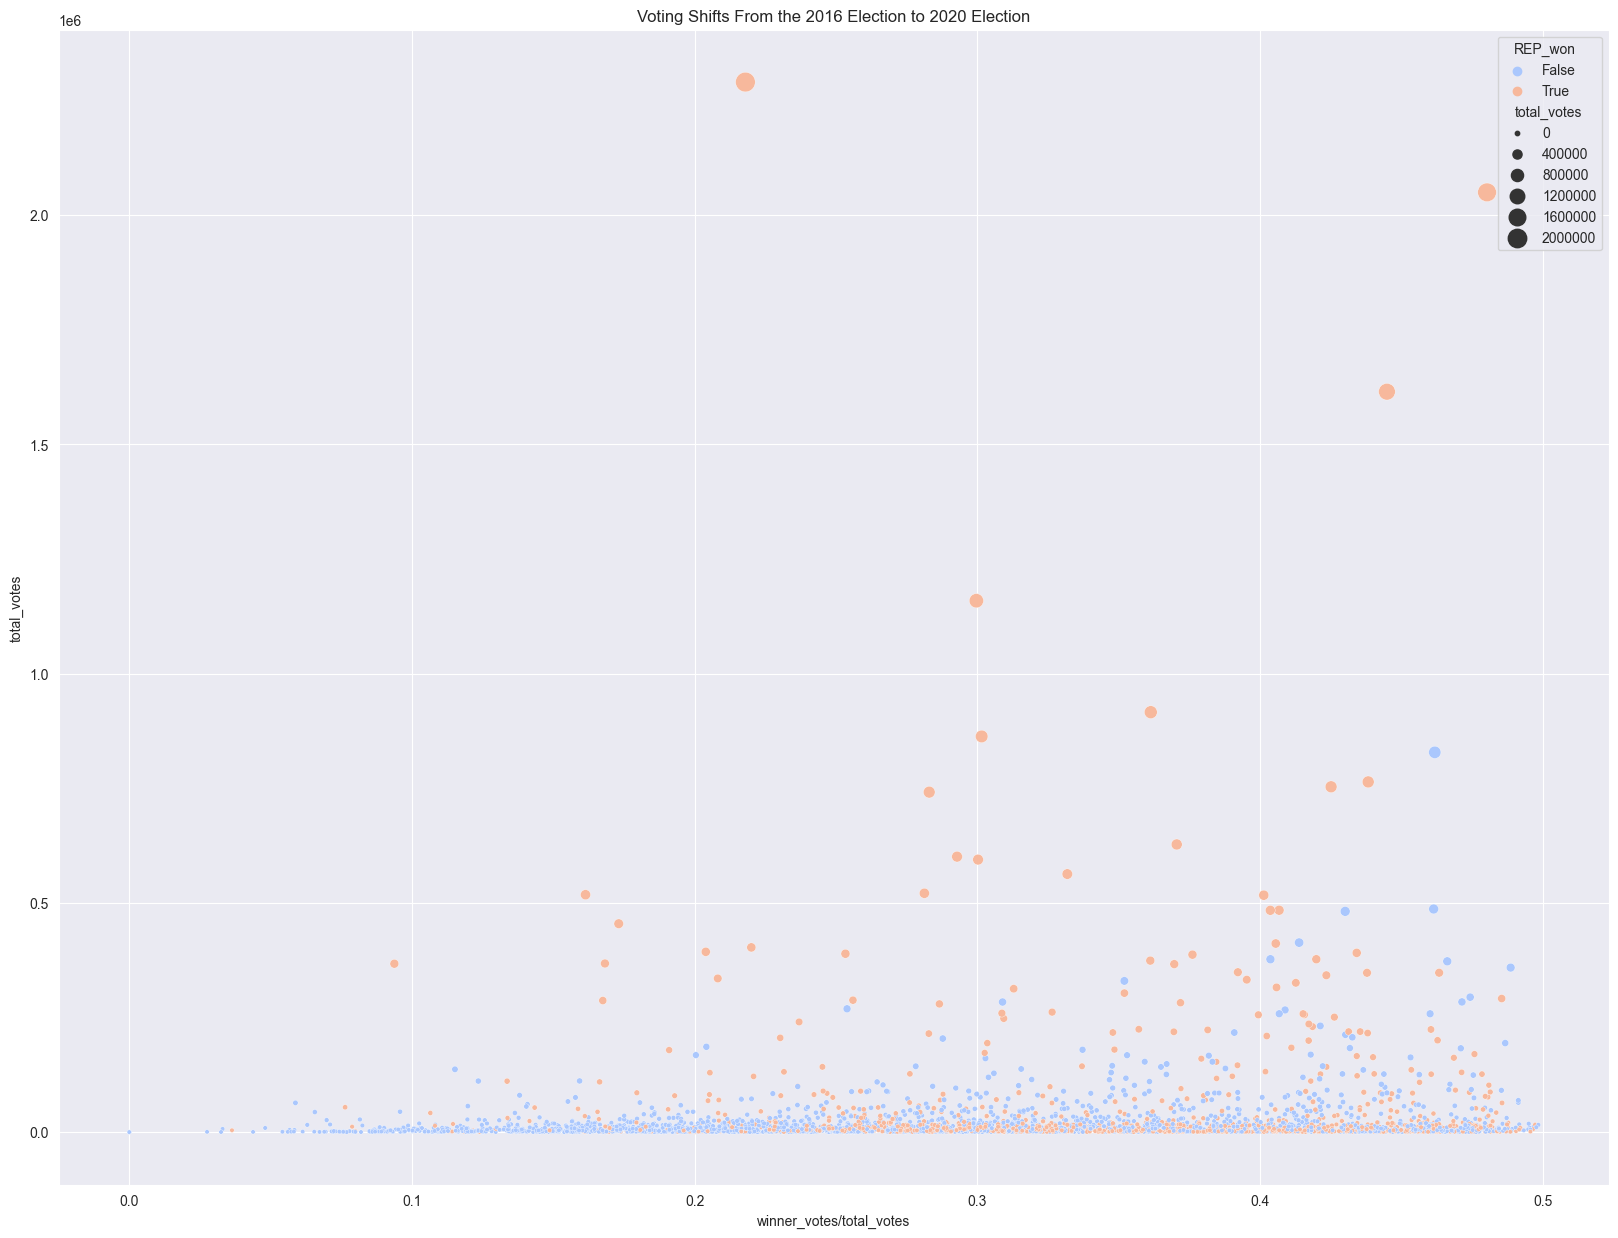

In [135]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df_winner, x = "winner_votes/total_votes", y = "total_votes", hue = "REP_won", size = "total_votes", palette = "coolwarm", sizes=(10,200))
plt.title("Voting Shifts From the 2016 Election to 2020 Election")